In [1]:
import pandas as pd
import os
pwd = os.getcwd() #pwd = present working directory
filepath = os.path.join(pwd, "tabel_tembak.csv")
data_tembak = pd.read_csv(filepath)
data_tembak

,isian,jarak_m,sudut_elevasi_der,sudut_elevasi_rad,waktu_lintas_det,tipe
0,0,100,83.35,1486,13.5,IPP
1,0,150,80.53,1426,13.4,IPP
2,0,200,76.47,1365,13.2,IPP
3,0,250,73.07,1300,13.0,IPP
4,0,300,69.04,1228,12.7,IPP
...,...,...,...,...,...,...
170,8,6100,55.07,980,47.4,"1 IPT COKLAT, 1 IPT MERAH, 2 IPT PUTIH, 4 IPT ..."
171,8,6200,53.43,955,46.6,"1 IPT COKLAT, 1 IPT MERAH, 2 IPT PUTIH, 4 IPT ..."
172,8,6300,52.09,927,45.7,"1 IPT COKLAT, 1 IPT MERAH, 2 IPT PUTIH, 4 IPT ..."
173,8,6400,50.00,889,44.5,"1 IPT COKLAT, 1 IPT MERAH, 2 IPT PUTIH, 4 IPT ..."


<AxesSubplot:xlabel='isian', ylabel='Count'>

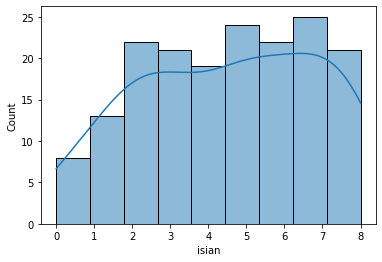

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=data_tembak, x='isian',kde=True) #Isian 0 - 2 mempunyai data sedikit, bisa mengurangi keakurasian

In [3]:
data_tembak_waktu = data_tembak.drop(['tipe', 'jarak_m'], axis=1)

In [4]:
data_tembak_waktu

,isian,sudut_elevasi_der,sudut_elevasi_rad,waktu_lintas_det
0,0,83.35,1486,13.5
1,0,80.53,1426,13.4
2,0,76.47,1365,13.2
3,0,73.07,1300,13.0
4,0,69.04,1228,12.7
...,...,...,...,...
170,8,55.07,980,47.4
171,8,53.43,955,46.6
172,8,52.09,927,45.7
173,8,50.00,889,44.5


In [5]:
data_tembak_jarak = data_tembak.drop(['waktu_lintas_det', 'tipe'], axis=1)

In [6]:
data_tembak_jarak

,isian,jarak_m,sudut_elevasi_der,sudut_elevasi_rad
0,0,100,83.35,1486
1,0,150,80.53,1426
2,0,200,76.47,1365
3,0,250,73.07,1300
4,0,300,69.04,1228
...,...,...,...,...
170,8,6100,55.07,980
171,8,6200,53.43,955
172,8,6300,52.09,927
173,8,6400,50.00,889


In [7]:
X_waktu = data_tembak_waktu.drop("waktu_lintas_det", axis=1)
y_waktu = data_tembak_waktu["waktu_lintas_det"]

In [8]:
X_jarak = data_tembak_jarak.drop("jarak_m", axis=1)
y_jarak = data_tembak_jarak["jarak_m"]

In [9]:
from sklearn.preprocessing import StandardScaler
scaler_waktu = StandardScaler()
scaler_waktu.fit(X_waktu)
standardized_data_waktu = scaler_waktu.transform(X_waktu)
X_waktu = standardized_data_waktu

In [10]:
scaler_jarak = StandardScaler()
scaler_jarak.fit(X_jarak)
standardized_data_jarak = scaler_jarak.transform(X_jarak)
X_jarak = standardized_data_jarak

In [11]:
from sklearn.model_selection import train_test_split

X_train_waktu, X_test_waktu, y_train_waktu, y_test_waktu = train_test_split(X_waktu, y_waktu, test_size=0.25, random_state=15)

In [12]:
X_train_jarak, X_test_jarak, y_train_jarak, y_test_jarak = train_test_split(X_jarak, y_jarak, test_size=0.25, random_state=47)

In [13]:
y_test_waktu.head(5)

80     34.4
21     23.7
145    48.3
58     30.2
125    42.9
Name: waktu_lintas_det, dtype: float64

In [14]:
y_test_jarak.head(5)

83     2400
25      500
138    4800
63     2600
82     3700
Name: jarak_m, dtype: int64

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

GBR_waktu = GradientBoostingRegressor()
GBR_waktu.fit(X_train_waktu, y_train_waktu)
accuracy_gbr_waktu = GBR_waktu.score(X_test_waktu, y_test_waktu)
print("Accuracy: ", accuracy_gbr_waktu * 100, "%")

Accuracy:  99.88546582609085 %


In [16]:
GBR_jarak = GradientBoostingRegressor()
GBR_jarak.fit(X_train_jarak, y_train_jarak)
accuracy_gbr_jarak = GBR_jarak.score(X_test_jarak, y_test_jarak)
print("Accuracy: ", accuracy_gbr_jarak * 100, "%")

Accuracy:  99.8155641943073 %


In [17]:
original_values_gbr_waktu = y_test_waktu[:10]

predicted_values_gbr_waktu = GBR_waktu.predict(X_test_waktu[:10])

comparison_dataframe_gbr_waktu = pd.DataFrame(data={"Original Values":original_values_gbr_waktu, "Predicted Values":predicted_values_gbr_waktu})

comparison_dataframe_gbr_waktu["Differences"] = comparison_dataframe_gbr_waktu["Original Values"] - comparison_dataframe_gbr_waktu["Predicted Values"]

comparison_dataframe_gbr_waktu

,Original Values,Predicted Values,Differences
80,34.4,34.452478,-0.052478
21,23.7,23.543546,0.156454
145,48.3,48.533502,-0.233502
58,30.2,30.653524,-0.453524
125,42.9,43.886633,-0.986633
9,18.1,18.060602,0.039398
121,45.0,44.956035,0.043965
171,46.6,46.977490,-0.377490
74,37.9,37.789708,0.110292
55,31.4,31.857016,-0.457016


In [18]:
original_values_gbr_jarak = y_test_jarak[:10]

predicted_values_gbr_jarak = GBR_jarak.predict(X_test_jarak[:10])

comparison_dataframe_gbr_jarak = pd.DataFrame(data={"Original Values":original_values_gbr_jarak, "Predicted Values":predicted_values_gbr_jarak})

comparison_dataframe_gbr_jarak["Differences"] = comparison_dataframe_gbr_jarak["Original Values"] - comparison_dataframe_gbr_jarak["Predicted Values"]

comparison_dataframe_gbr_jarak

,Original Values,Predicted Values,Differences
83,2400,2589.313142,-189.313142
25,500,469.598125,30.401875
138,4800,4791.269945,8.730055
63,2600,2534.992627,65.007373
82,3700,3692.034762,7.965238
143,5300,5279.110599,20.889401
128,5600,5536.672586,63.327414
85,2600,2705.306498,-105.306498
108,3600,3694.865219,-94.865219
36,1050,1132.290489,-82.290489


In [19]:
GBR_waktu.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [20]:
from sklearn.model_selection import GridSearchCV

parameters_waktu = {'learning_rate': [0.03],
                  'subsample'    : [0.2],
                  'n_estimators' : [1500],
                  'max_features'    : [3],
                  'random_state' : [20]
             }

In [21]:
grid_GBR_waktu = GridSearchCV(estimator=GBR_waktu, param_grid = parameters_waktu, cv=5, n_jobs=-1)
grid_GBR_waktu.fit(X_train_waktu, y_train_waktu)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.03], 'max_features': [3],
                         'n_estimators': [1500], 'random_state': [20],
                         'subsample': [0.2]})

In [22]:
grid_GBR_waktu.best_estimator_

GradientBoostingRegressor(learning_rate=0.03, max_features=3, n_estimators=1500,
                          random_state=20, subsample=0.2)

In [23]:
grid_GBR_waktu.best_score_

0.9988765356269027

In [24]:
GBR_best_waktu = grid_GBR_waktu.best_estimator_
accuracy_gbr_best_waktu = GBR_best_waktu.score(X_test_waktu, y_test_waktu)
print("Accuracy: ", accuracy_gbr_best_waktu * 100, "%")

Accuracy:  99.92712777342095 %


In [25]:
parameters_jarak = {'learning_rate': [0.01],
                  'subsample'    : [0.3],
                  'n_estimators' : [1500],
                  'max_depth'    : [4],
                  'random_state' : [20]
             }

In [26]:
grid_GBR_jarak = GridSearchCV(estimator=GBR_jarak, param_grid = parameters_jarak, cv=5, n_jobs=-1)
grid_GBR_jarak.fit(X_train_jarak, y_train_jarak)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01], 'max_depth': [4],
                         'n_estimators': [1500], 'random_state': [20],
                         'subsample': [0.3]})

In [27]:
grid_GBR_jarak.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=1500,
                          random_state=20, subsample=0.3)

In [28]:
GBR_best_jarak = grid_GBR_jarak.best_estimator_
accuracy_gbr_best_jarak = GBR_best_jarak.score(X_test_jarak, y_test_jarak)
print("Accuracy: ", accuracy_gbr_best_jarak * 100, "%")

Accuracy:  99.97253669969686 %


In [29]:
import pickle

In [30]:
pickle.dump(GBR_best_waktu,open('model_waktu.pkl','wb'))

In [31]:
pickle.dump(GBR_best_jarak,open('model_jarak.pkl','wb'))

In [32]:
original_values_gbr_best_waktu = y_test_waktu

predicted_values_gbr_best_waktu = GBR_best_waktu.predict(X_test_waktu)

comparison_dataframe_gbr_best_waktu = pd.DataFrame(data={"Original Values":original_values_gbr_best_waktu, "Predicted Values":predicted_values_gbr_best_waktu})

comparison_dataframe_gbr_best_waktu["Differences"] = comparison_dataframe_gbr_best_waktu["Original Values"] - comparison_dataframe_gbr_best_waktu["Predicted Values"]

comparison_dataframe_gbr_best_waktu

,Original Values,Predicted Values,Differences
80,34.4,34.741097,-0.341097
21,23.7,23.778393,-0.078393
145,48.3,48.445517,-0.145517
58,30.2,30.296542,-0.096542
125,42.9,42.919665,-0.019665
9,18.1,18.003365,0.096635
121,45.0,44.942110,0.057890
171,46.6,46.876100,-0.276100
74,37.9,37.540940,0.359060
55,31.4,31.618714,-0.218714


In [33]:
comparison_dataframe_gbr_best_waktu['Differences'].max(axis=0)

0.6946398564126142

In [34]:
comparison_dataframe_gbr_best_waktu['Differences'].min(axis=0)

-1.1599998361894706

In [35]:
original_values_gbr_best_jarak = y_test_jarak

predicted_values_gbr_best_jarak = GBR_best_jarak.predict(X_test_jarak)

comparison_dataframe_gbr_best_jarak = pd.DataFrame(data={"Original Values":original_values_gbr_best_jarak, "Predicted Values":predicted_values_gbr_best_jarak})

comparison_dataframe_gbr_best_jarak["Differences"] = comparison_dataframe_gbr_best_jarak["Original Values"] - comparison_dataframe_gbr_best_jarak["Predicted Values"]

comparison_dataframe_gbr_best_jarak

,Original Values,Predicted Values,Differences
83,2400,2526.558251,-126.558251
25,500,521.918047,-21.918047
138,4800,4795.486221,4.513779
63,2600,2498.051324,101.948676
82,3700,3704.537565,-4.537565
143,5300,5272.062047,27.937953
128,5600,5595.122511,4.877489
85,2600,2596.132868,3.867132
108,3600,3564.807165,35.192835
36,1050,1062.779277,-12.779277


In [36]:
comparison_dataframe_gbr_best_jarak['Differences'].max(axis=0)

101.94867594683092

In [37]:
comparison_dataframe_gbr_best_jarak['Differences'].min(axis=0)

-126.55825056845288

## Membuat Fungsi Prediksi

In [38]:
import numpy as np

In [39]:
def prediction_system_waktu(data):
    input_data = data
#     print(input_data)
    
    input_data_as_numpy = np.asarray(input_data)
#     print(input_data_as_numpy)
    
    input_data_reshaped = input_data_as_numpy.reshape(1, -1)
#     print(input_data_reshaped)
    
    std_data = scaler_waktu.transform(input_data_reshaped)
#     print(std_data)
    
    prediction_waktu = GBR_best_waktu.predict(std_data)
    
    return prediction_waktu

In [40]:
def prediction_system_jarak(data):
    input_data = data
#     print(input_data)
    
    input_data_as_numpy = np.asarray(input_data)
#     print(input_data_as_numpy)
    
    input_data_reshaped = input_data_as_numpy.reshape(1, -1)
#     print(input_data_reshaped)
    
    std_data = scaler_jarak.transform(input_data_reshaped)
#     print(std_data)
    
    prediction_jarak = GBR_best_jarak.predict(std_data)
    prediction_jarak = np.round_(prediction_jarak)
    
    return prediction_jarak

In [41]:
def convert_to_rad(dataraw):
    input_data = dataraw
    
    input_list = list(input_data)
    pi = 22/7
    
    radian = input_list[1]*(pi/180)
    radian = round(radian * 1000)
#     print(radian)
    input_list[2] = radian
    column_values_rad.append(radian)
    input_data = tuple(input_list)
    
    return input_data

In [553]:
#Input 1 = Isian, Input 2 = Derajat, Input 3 = Radian(dikosongkan)
data1 = (8, 44, 0)

#testing output
test = 39
column_values_derajat = []
column_values_rad = []
column_values_jarak = []
column_values_waktu = []
column_values_isian = []

for x in range(test):
    input_list = list(data1)
    input_list[1] = input_list[1] + 1
    print(input_list[1], "derajat")
    data1 = tuple(input_list)
    processed = convert_to_rad(data1)
    
    predictionWaktu = prediction_system_waktu(processed)
    predictionJarak = prediction_system_jarak(processed)
    
    pred_converted_waktu = float(predictionWaktu)
    pred_2f_waktu = "{:.2f}".format(pred_converted_waktu)
    pred_converted_jarak = int(predictionJarak)
    
    column_values_derajat.append(input_list[1])
    column_values_isian.append(input_list[0])
    column_values_jarak.append(pred_converted_jarak)
    column_values_waktu.append(pred_2f_waktu)
    
    print("Waktu Lintas: ", pred_2f_waktu, "detik")
    print("Jarak:", pred_converted_jarak, "meter\n")
    
    
# processed = convert_to_rad(data1)
# print(processed)

# predictionWaktu = prediction_system_waktu(processed)
# predictionJarak = prediction_system_jarak(processed)

# pred_converted_waktu = float(predictionWaktu)
# pred_2f_waktu = "{:.2f}".format(pred_converted_waktu)
# pred_converted_jarak = int(predictionJarak)

# print("Waktu Lintas: ", pred_2f_waktu, "detik")
# print("Jarak:", pred_converted_jarak, "meter")

45 derajat
Waktu Lintas:  41.23 detik
Jarak: 6520 meter

46 derajat
Waktu Lintas:  41.47 detik
Jarak: 6515 meter

47 derajat
Waktu Lintas:  41.83 detik
Jarak: 6485 meter

48 derajat
Waktu Lintas:  42.57 detik
Jarak: 6456 meter

49 derajat
Waktu Lintas:  43.38 detik
Jarak: 6418 meter

50 derajat
Waktu Lintas:  44.21 detik
Jarak: 6401 meter

51 derajat
Waktu Lintas:  44.51 detik
Jarak: 6379 meter

52 derajat
Waktu Lintas:  45.45 detik
Jarak: 6332 meter

53 derajat
Waktu Lintas:  45.95 detik
Jarak: 6275 meter

54 derajat
Waktu Lintas:  46.57 detik
Jarak: 6202 meter

55 derajat
Waktu Lintas:  47.42 detik
Jarak: 6132 meter

56 derajat
Waktu Lintas:  47.56 detik
Jarak: 6060 meter

57 derajat
Waktu Lintas:  48.13 detik
Jarak: 6004 meter

58 derajat
Waktu Lintas:  48.37 detik
Jarak: 5916 meter

59 derajat
Waktu Lintas:  48.61 detik
Jarak: 5794 meter

60 derajat
Waktu Lintas:  49.51 detik
Jarak: 5663 meter

61 derajat
Waktu Lintas:  50.12 detik
Jarak: 5554 meter

62 derajat
Waktu Lintas:  50.67

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have v

## Menjadikan Data Prediksi Menjadi Dataframe

In [528]:
data_prediksi_0 = pd.DataFrame()
data_prediksi_0["Isian"] = column_values_isian

In [530]:
data_prediksi_0["Derajat"] = column_values_derajat
data_prediksi_0["Radian"] = column_values_rad
data_prediksi_0["Jarak"] = column_values_jarak
data_prediksi_0["Waktu Lintas"] = column_values_waktu
data_prediksi_0

,Isian,Derajat,Radian,Jarak,Waktu Lintas
0,0,45,786,475,9.59
1,0,46,803,473,9.59
2,0,47,821,468,9.65
3,0,48,838,473,9.91
4,0,49,856,484,10.35
5,0,50,873,507,10.44
6,0,51,890,505,10.48
7,0,52,908,528,10.61
8,0,53,925,526,11.07
9,0,54,943,522,11.27


In [536]:
data_prediksi_1 = pd.DataFrame()
data_prediksi_1["Isian"] = column_values_isian
data_prediksi_1["Derajat"] = column_values_derajat
data_prediksi_1["Radian"] = column_values_rad
data_prediksi_1["Jarak"] = column_values_jarak
data_prediksi_1["Waktu Lintas"] = column_values_waktu
data_prediksi_1

,Isian,Derajat,Radian,Jarak,Waktu Lintas
0,1,45,786,792,12.94
1,1,46,803,785,12.93
2,1,47,821,771,13.05
3,1,48,838,767,13.30
4,1,49,856,772,13.76
5,1,50,873,794,13.91
6,1,51,890,792,13.95
7,1,52,908,806,14.22
8,1,53,925,804,14.77
9,1,54,943,800,15.03


In [542]:
data_prediksi_2 = pd.DataFrame()
data_prediksi_2["Isian"] = column_values_isian
data_prediksi_2["Derajat"] = column_values_derajat
data_prediksi_2["Radian"] = column_values_rad
data_prediksi_2["Jarak"] = column_values_jarak
data_prediksi_2["Waktu Lintas"] = column_values_waktu
data_prediksi_2

,Isian,Derajat,Radian,Jarak,Waktu Lintas
0,2,45,786,1330,17.06
1,2,46,803,1321,17.07
2,2,47,821,1305,17.25
3,2,48,838,1297,17.54
4,2,49,856,1300,18.06
5,2,50,873,1319,18.38
6,2,51,890,1312,18.30
7,2,52,908,1318,18.41
8,2,53,925,1312,19.12
9,2,54,943,1304,19.61


In [544]:
data_prediksi_3 = pd.DataFrame()
data_prediksi_3["Isian"] = column_values_isian
data_prediksi_3["Derajat"] = column_values_derajat
data_prediksi_3["Radian"] = column_values_rad
data_prediksi_3["Jarak"] = column_values_jarak
data_prediksi_3["Waktu Lintas"] = column_values_waktu
data_prediksi_3

,Isian,Derajat,Radian,Jarak,Waktu Lintas
0,3,45,786,2516,24.52
1,3,46,803,2508,24.54
2,3,47,821,2495,24.88
3,3,48,838,2490,25.22
4,3,49,856,2488,25.51
5,3,50,873,2501,26.02
6,3,51,890,2504,26.01
7,3,52,908,2502,26.04
8,3,53,925,2499,26.75
9,3,54,943,2481,27.17


In [546]:
data_prediksi_4 = pd.DataFrame()
data_prediksi_4["Isian"] = column_values_isian
data_prediksi_4["Derajat"] = column_values_derajat
data_prediksi_4["Radian"] = column_values_rad
data_prediksi_4["Jarak"] = column_values_jarak
data_prediksi_4["Waktu Lintas"] = column_values_waktu
data_prediksi_4

,Isian,Derajat,Radian,Jarak,Waktu Lintas
0,4,45,786,3729,31.29
1,4,46,803,3716,31.26
2,4,47,821,3696,31.48
3,4,48,838,3689,31.82
4,4,49,856,3672,32.29
5,4,50,873,3653,32.67
6,4,51,890,3629,32.53
7,4,52,908,3595,32.62
8,4,53,925,3580,33.75
9,4,54,943,3525,34.12


In [548]:
data_prediksi_5 = pd.DataFrame()
data_prediksi_5["Isian"] = column_values_isian
data_prediksi_5["Derajat"] = column_values_derajat
data_prediksi_5["Radian"] = column_values_rad
data_prediksi_5["Jarak"] = column_values_jarak
data_prediksi_5["Waktu Lintas"] = column_values_waktu
data_prediksi_5

,Isian,Derajat,Radian,Jarak,Waktu Lintas
0,5,45,786,4742,35.86
1,5,46,803,4726,35.83
2,5,47,821,4705,36.18
3,5,48,838,4690,36.61
4,5,49,856,4662,37.16
5,5,50,873,4620,37.46
6,5,51,890,4584,37.59
7,5,52,908,4544,38.10
8,5,53,925,4526,38.87
9,5,54,943,4464,39.47


In [550]:
data_prediksi_6 = pd.DataFrame()
data_prediksi_6["Isian"] = column_values_isian
data_prediksi_6["Derajat"] = column_values_derajat
data_prediksi_6["Radian"] = column_values_rad
data_prediksi_6["Jarak"] = column_values_jarak
data_prediksi_6["Waktu Lintas"] = column_values_waktu
data_prediksi_6

,Isian,Derajat,Radian,Jarak,Waktu Lintas
0,6,45,786,5595,40.37
1,6,46,803,5581,40.32
2,6,47,821,5543,40.60
3,6,48,838,5510,41.06
4,6,49,856,5467,41.45
5,6,50,873,5438,41.68
6,6,51,890,5403,41.73
7,6,52,908,5369,42.41
8,6,53,925,5313,42.99
9,6,54,943,5233,43.55


In [552]:
data_prediksi_7 = pd.DataFrame()
data_prediksi_7["Isian"] = column_values_isian
data_prediksi_7["Derajat"] = column_values_derajat
data_prediksi_7["Radian"] = column_values_rad
data_prediksi_7["Jarak"] = column_values_jarak
data_prediksi_7["Waktu Lintas"] = column_values_waktu
data_prediksi_7

,Isian,Derajat,Radian,Jarak,Waktu Lintas
0,7,45,786,6275,42.74
1,7,46,803,6263,42.90
2,7,47,821,6224,43.27
3,7,48,838,6183,43.76
4,7,49,856,6133,44.36
5,7,50,873,6107,44.90
6,7,51,890,6078,45.13
7,7,52,908,6032,45.90
8,7,53,925,5968,46.41
9,7,54,943,5890,46.92


In [554]:
data_prediksi_8 = pd.DataFrame()
data_prediksi_8["Isian"] = column_values_isian
data_prediksi_8["Derajat"] = column_values_derajat
data_prediksi_8["Radian"] = column_values_rad
data_prediksi_8["Jarak"] = column_values_jarak
data_prediksi_8["Waktu Lintas"] = column_values_waktu
data_prediksi_8

,Isian,Derajat,Radian,Jarak,Waktu Lintas
0,8,45,786,6520,41.23
1,8,46,803,6515,41.47
2,8,47,821,6485,41.83
3,8,48,838,6456,42.57
4,8,49,856,6418,43.38
5,8,50,873,6401,44.21
6,8,51,890,6379,44.51
7,8,52,908,6332,45.45
8,8,53,925,6275,45.95
9,8,54,943,6202,46.57


## Distribusi Derajat pada Waktu Lintas

<AxesSubplot:xlabel='Derajat', ylabel='Waktu Lintas'>

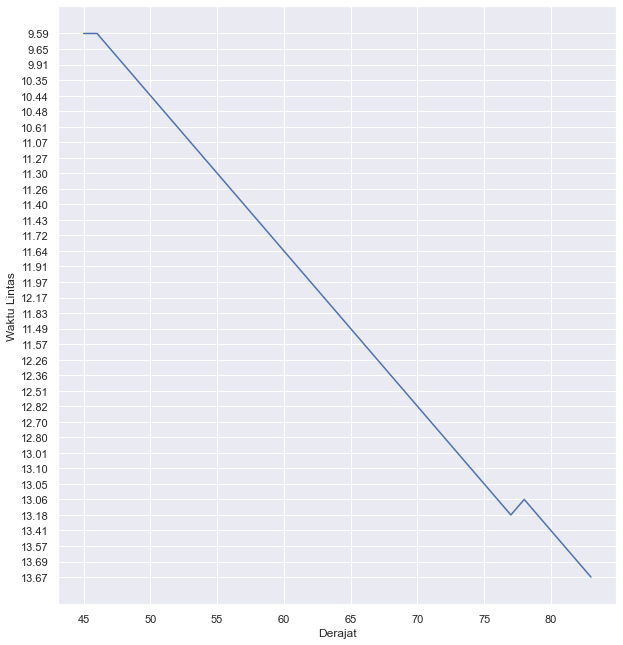

In [555]:
sns.set(rc={'figure.figsize':(10,11)})
sns.lineplot(data=data_prediksi_0, x="Derajat", y ="Waktu Lintas")

<AxesSubplot:xlabel='Derajat', ylabel='Waktu Lintas'>

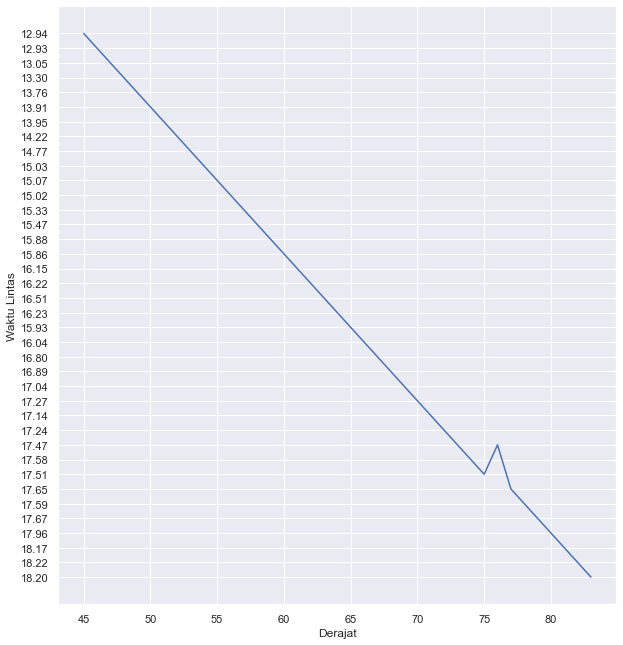

In [556]:
sns.lineplot(data=data_prediksi_1, x="Derajat", y ="Waktu Lintas")

<AxesSubplot:xlabel='Derajat', ylabel='Waktu Lintas'>

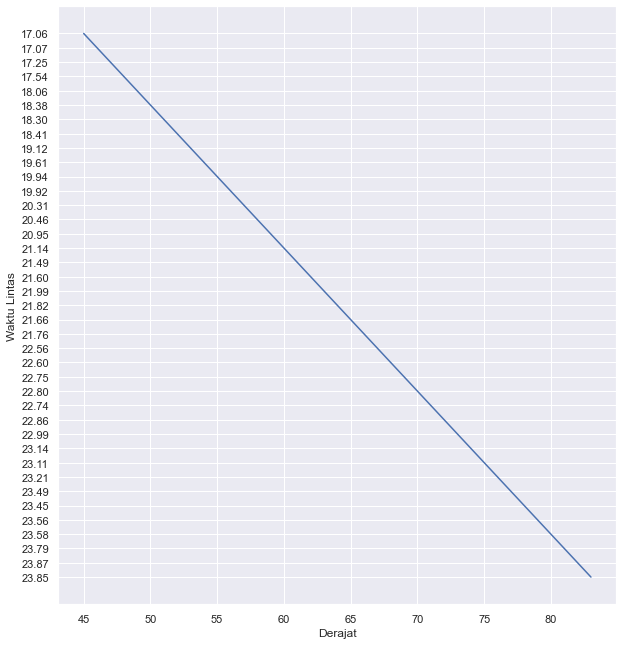

In [557]:
sns.lineplot(data=data_prediksi_2, x="Derajat", y ="Waktu Lintas")

<AxesSubplot:xlabel='Derajat', ylabel='Waktu Lintas'>

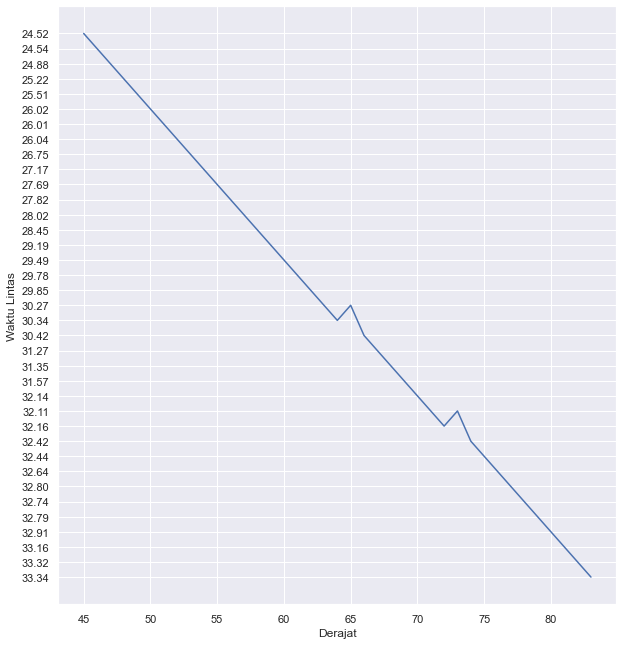

In [558]:
sns.lineplot(data=data_prediksi_3, x="Derajat", y ="Waktu Lintas")

<AxesSubplot:xlabel='Derajat', ylabel='Waktu Lintas'>

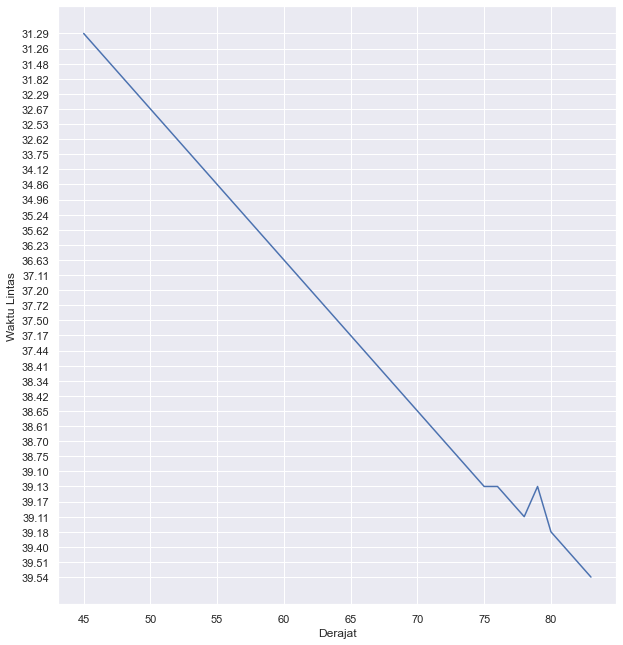

In [559]:
sns.lineplot(data=data_prediksi_4, x="Derajat", y ="Waktu Lintas")

<AxesSubplot:xlabel='Derajat', ylabel='Waktu Lintas'>

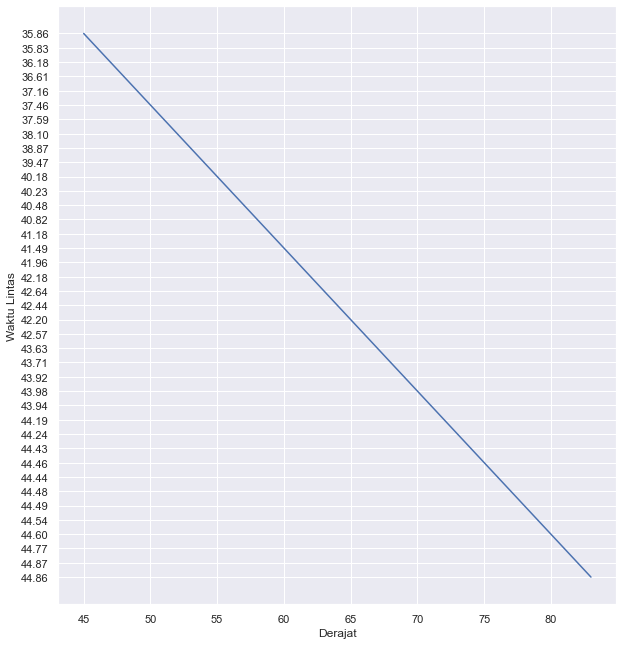

In [560]:
sns.lineplot(data=data_prediksi_5, x="Derajat", y ="Waktu Lintas")

<AxesSubplot:xlabel='Derajat', ylabel='Waktu Lintas'>

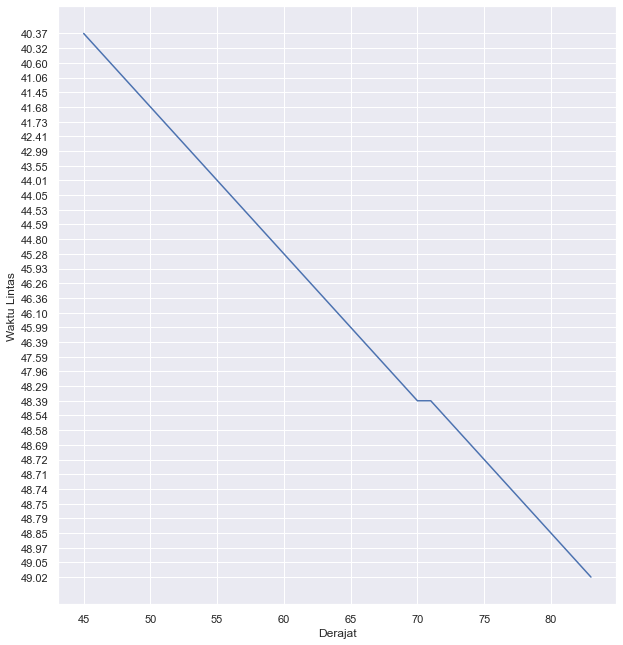

In [561]:
sns.lineplot(data=data_prediksi_6, x="Derajat", y ="Waktu Lintas")

<AxesSubplot:xlabel='Derajat', ylabel='Waktu Lintas'>

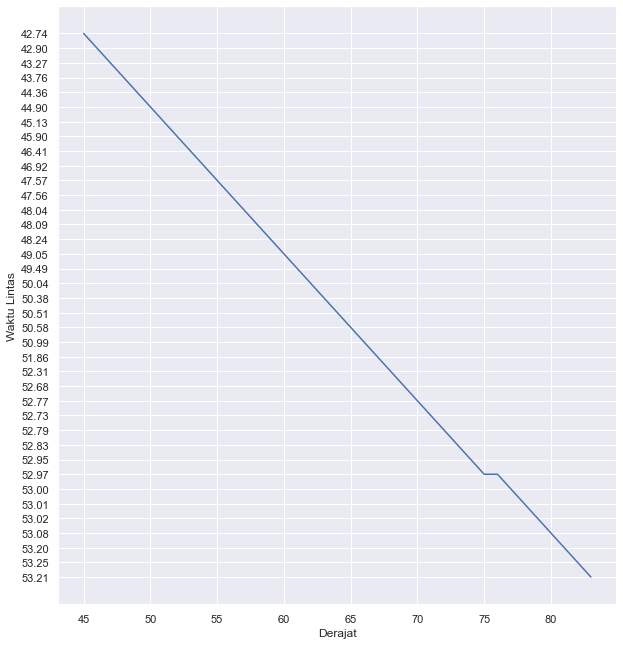

In [562]:
sns.lineplot(data=data_prediksi_7, x="Derajat", y ="Waktu Lintas")

<AxesSubplot:xlabel='Derajat', ylabel='Waktu Lintas'>

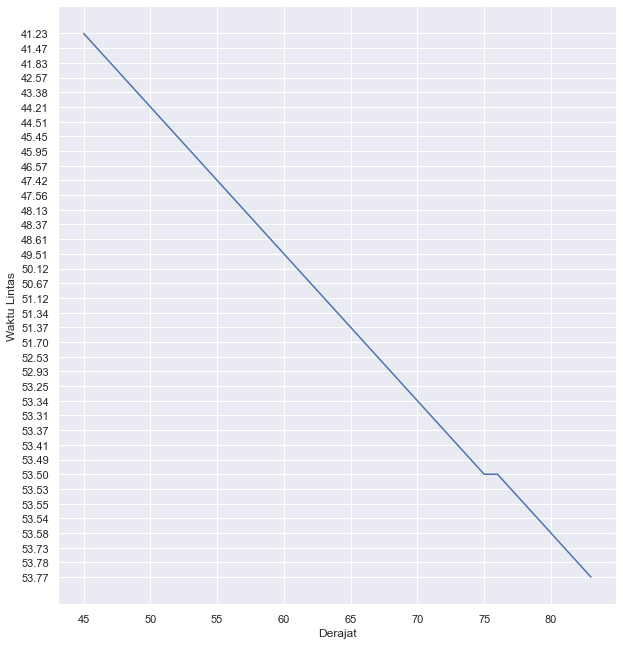

In [563]:
sns.lineplot(data=data_prediksi_8, x="Derajat", y ="Waktu Lintas")

## Distribusi Derajat pada Jarak

<AxesSubplot:xlabel='Derajat', ylabel='Jarak'>

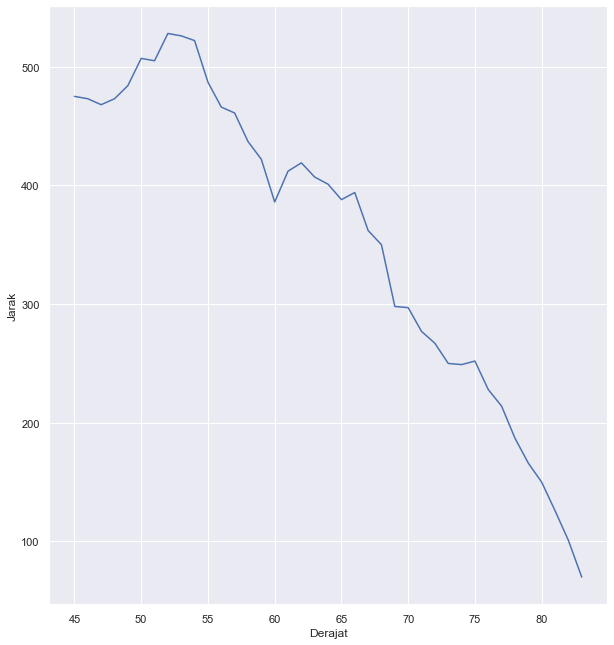

In [564]:
sns.lineplot(data=data_prediksi_0, x="Derajat", y ="Jarak")

<AxesSubplot:xlabel='Derajat', ylabel='Jarak'>

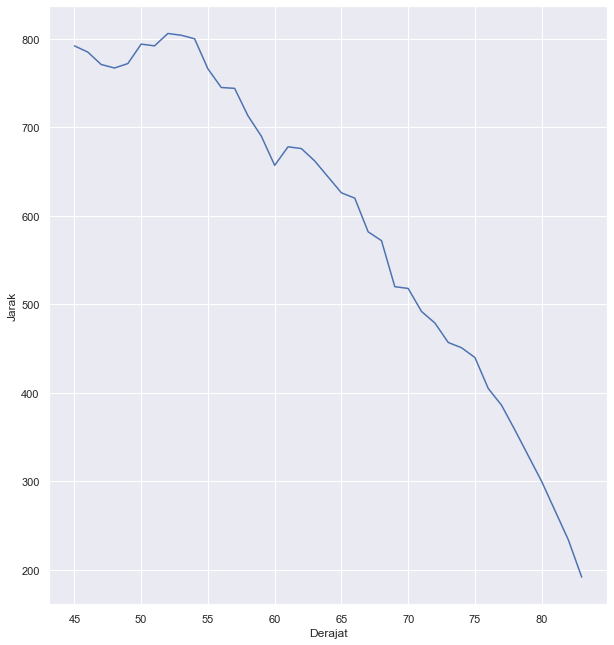

In [565]:
sns.lineplot(data=data_prediksi_1, x="Derajat", y ="Jarak")

<AxesSubplot:xlabel='Derajat', ylabel='Jarak'>

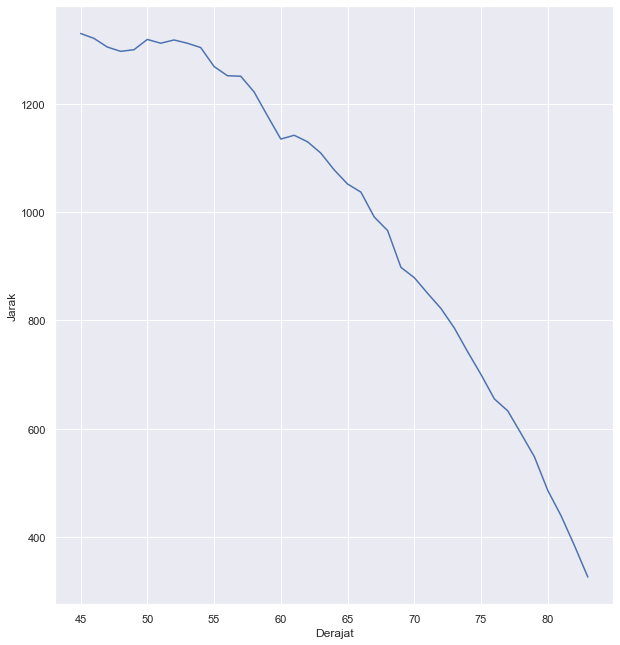

In [566]:
sns.lineplot(data=data_prediksi_2, x="Derajat", y ="Jarak")

<AxesSubplot:xlabel='Derajat', ylabel='Jarak'>

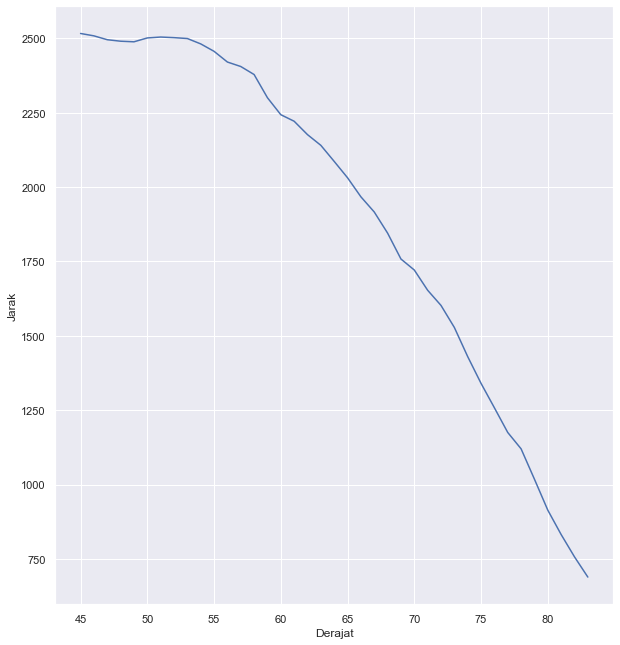

In [567]:
sns.lineplot(data=data_prediksi_3, x="Derajat", y ="Jarak")

<AxesSubplot:xlabel='Derajat', ylabel='Jarak'>

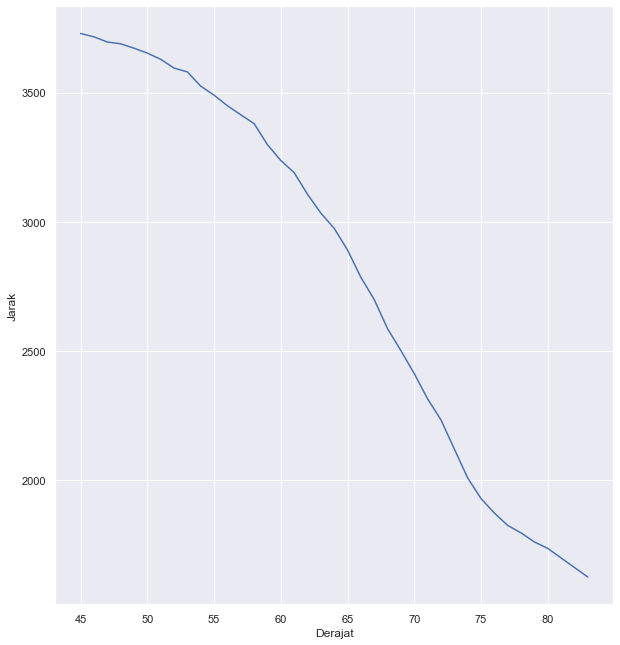

In [568]:
sns.lineplot(data=data_prediksi_4, x="Derajat", y ="Jarak")

<AxesSubplot:xlabel='Derajat', ylabel='Jarak'>

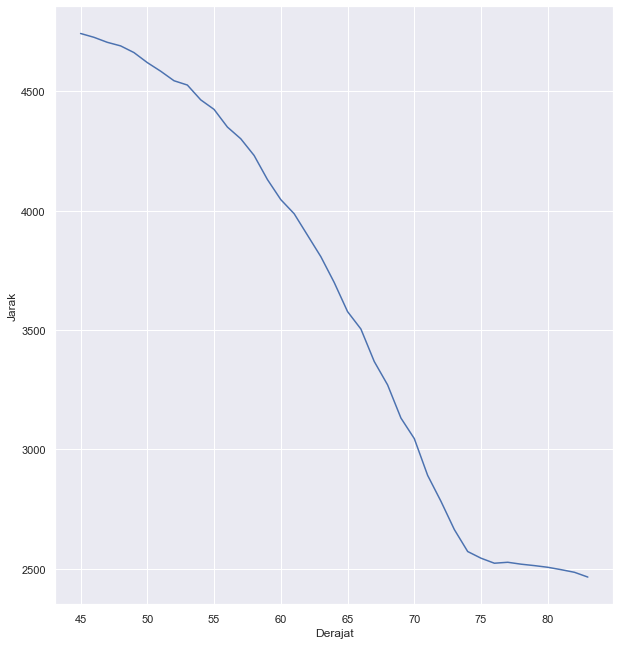

In [569]:
sns.lineplot(data=data_prediksi_5, x="Derajat", y ="Jarak")

<AxesSubplot:xlabel='Derajat', ylabel='Jarak'>

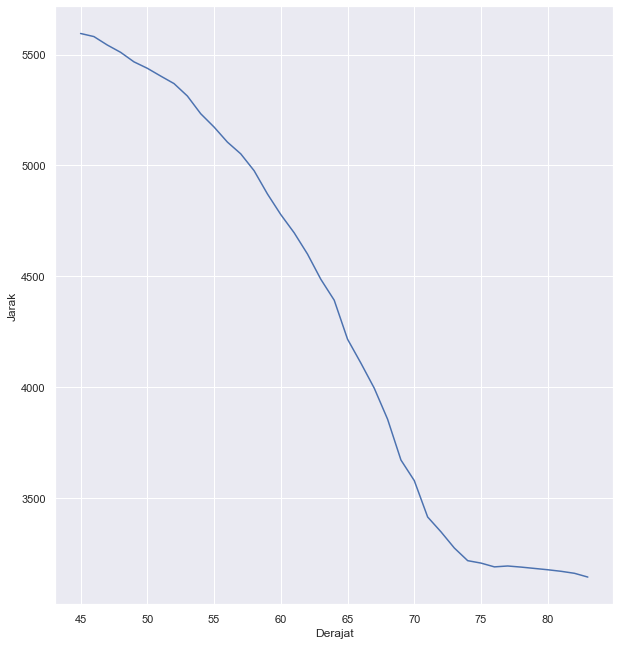

In [570]:
sns.lineplot(data=data_prediksi_6, x="Derajat", y ="Jarak")

<AxesSubplot:xlabel='Derajat', ylabel='Jarak'>

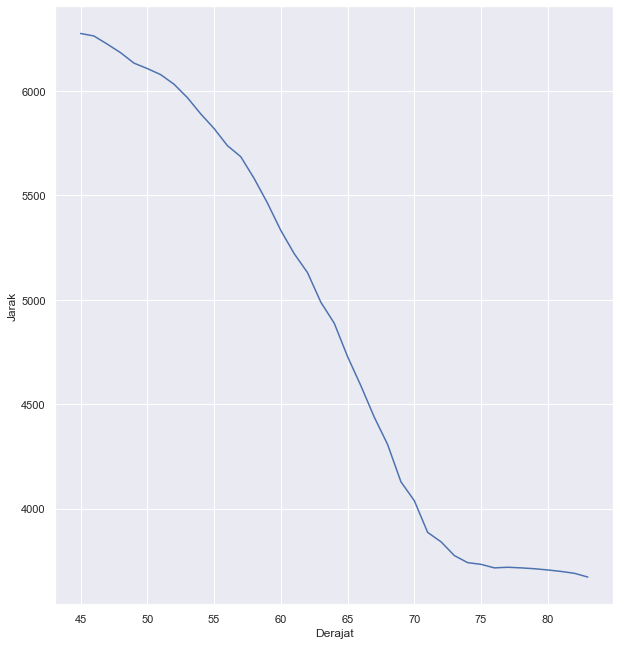

In [571]:
sns.lineplot(data=data_prediksi_7, x="Derajat", y ="Jarak")

<AxesSubplot:xlabel='Derajat', ylabel='Jarak'>

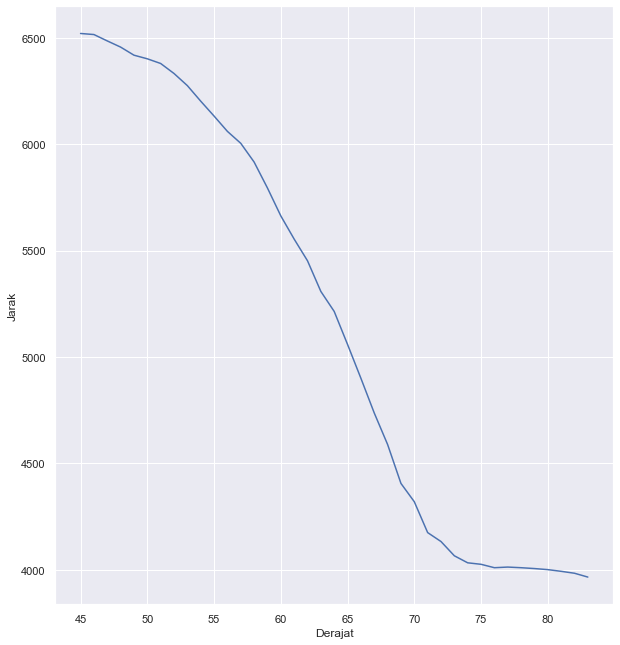

In [572]:
sns.lineplot(data=data_prediksi_8, x="Derajat", y ="Jarak")